<a href="https://colab.research.google.com/github/rabindramahato3/AppliedAI/blob/main/2_EDA_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H1><center><u><b>EXPLORAORY DATA ANALYSIS ON HABERMAN DATASET</b></u></center></H1>

# Introduction

<i><b>Exploratory Data Analysis (EDA)</b> is a process of performing initial investigation on data, so as to discover patterns, to spot anomalies, to test hypothesis, and to check assumptions with the help of summary statistics and graphical representations.

<u>HABERMAN DATASET :</u> <br>
  
  **Dataset Description :** *The Haberman's Survival Dataset contains from a study that was conducted in the period of 1958 - 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.* <br>

Number of Instances: 306 <br>
Number of Attributes: 4 (including the class attribute) <br>

  **Attribute Description :**
- Age of patient at time of operation (numerical)
- Patient's year of operation (year - 1900, numerical)
- Number of positive axillary nodes detected (numerical)
- Survival status (class attribute) : <br>
 - 1 = the patient survived 5 years or longer
 - 2 = the patient died within 5 year

<i><b>Axillary nodes or Axillary Lymph Nodes</b> are lymph nodes in the human armpit. <b>Between 20 and 49 in number</b>, they drain lymph vessels from the lateral quadrants of the breast, the superficial lymph vessels from thin walls of the chest and the abdomen above the level of the navel, and the vessels from the upper limb. These lymph nodes are clinically significant in breast cancer, and metastases from the breast to the axillary lymph nodes are considered in the staging of the disease.</i>

**Positive Axillary Lymph Node** : A lymph node in the area of the armpit (axilla) to which cancer has spread. This spread is determined by surgically removing some of the lymph nodes and examining them under a microscope to see whether cancer cells are present.
 - detected 0 : Cancer has not spread to the lymph nodes.
 - detected 1-3 : the nodes inside the breast, show very small amounts of cancerous cells.
 - detected 4-9 :  indicate that the nodes inside the breast have developed cancer.
 - detected more than 10 : Treatment becomes more difficult, and the outlook is less positive or say chances of successful treatment is less.

<u><i>More the number of Positive Axillary Lymph Nodes detected, higher the risk in the cancer treatment.</i></u>

# Preparing the Data

<i> Before doing anything with our data, we must prepare and check data to enhance performance. Pre-processing of data allows us for the removal of unwanted data with the use of data cleaning, this allows the us to have a dataset to contain more valuable information. 
<p> Data preprocessing has the objective to add missing values, aggregate information, label data with categories and smooth a trajectory.
- Importing the required packages.
- Loading the data.
- Check for duplicates values and apply necessary steps
- Check for missing values and apply necessary steps
- Apply necessary transformation to be more meaningful.

In [2]:
# check for the input dataset
import os
print(os.listdir())

['.config', 'drive', 'haberman.csv', 'sample_data']


In [3]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [4]:
# load the data
data = pd.read_csv('haberman.csv') 
print(data)

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
301   75    62      1       1
302   76    67      0       1
303   77    65      3       1
304   78    65      1       2
305   83    58      2       2

[306 rows x 4 columns]


In [5]:
# check for duplicates values in the dataset
duplicate = data[data.duplicated()]
print(duplicate)
print(f'\n {len(duplicate)} duplicates found.')


     age  year  nodes  status
23    37    63      0       1
27    38    60      0       1
52    41    65      0       1
65    43    64      0       2
78    44    61      0       1
108   48    58     11       2
132   50    61      0       1
179   54    62      0       1
184   55    58      1       1
196   56    60      0       1
206   57    64      0       1
233   61    59      0       1
237   61    59      0       1
243   62    66      0       1
249   63    63      0       1
266   65    64      0       1
276   67    66      0       1

 17 duplicates found.


- 17 duplicates found. Required to be removed.

In [6]:

# dropping the duplicate rows and reseting the index count
data = data.drop_duplicates()
data.reset_index(inplace = True, drop = True)
print(data)
print(f'\n duplicates removed.')

     age  year  nodes  status
0     30    64      1       1
1     30    62      3       1
2     30    65      0       1
3     31    59      2       1
4     31    65      4       1
..   ...   ...    ...     ...
284   75    62      1       1
285   76    67      0       1
286   77    65      3       1
287   78    65      1       2
288   83    58      2       2

[289 rows x 4 columns]

 duplicates removed.


In [7]:
# check for missing values
data.isna().any()

age       False
year      False
nodes     False
status    False
dtype: bool

- No missing values in the dataset.

In [8]:
# overview of the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     289 non-null    int64
 1   year    289 non-null    int64
 2   nodes   289 non-null    int64
 3   status  289 non-null    int64
dtypes: int64(4)
memory usage: 9.2 KB
None


- All the values in each column is of same data-type.
- some column names can be changed to make it more meaningful to us.<br>
    age --> age(*age of patient durning surgery*) <br>
    year --> op_year(*year in which operation is performed*) <br>
    nodes --> pos_axil_nodes(*number of positive axillary nodes detected*) <br>
    status --> status_after_5yrs(*survival status of patient after 5 years of surgery*) <br>
- Data-type of *status_after_5yrs(class attribute column)* is integer. Required to changed into categorical data-type.
- The values of 'status_after_5_years' column are not meanigful. Can be mapped to 'alive' for '1'(the patient survived 5 years or longer) and 'dead' for '2'(the patient died within 5 year).

In [9]:
# applying the above recommendations
# updating columns names
data.columns = ['age', 'op_year', 'pos_axil_nodes', 'status_after_5yrs']

In [10]:
# unique values in class atribute
print(data['status_after_5yrs'].unique())

[1 2]


In [11]:
# changing class attribute datatype to category and mapping it to be more meaningful
data['status_after_5yrs'] = data['status_after_5yrs'].map({1:'alive', 2:'dead'})
data['status_after_5yrs'] = data['status_after_5yrs'].astype('category')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
print(data.head(10))
print(data.info())

   age  op_year  pos_axil_nodes status_after_5yrs
0   30       64               1             alive
1   30       62               3             alive
2   30       65               0             alive
3   31       59               2             alive
4   31       65               4             alive
5   33       58              10             alive
6   33       60               0             alive
7   34       59               0              dead
8   34       66               9              dead
9   34       58              30             alive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                289 non-null    int64   
 1   op_year            289 non-null    int64   
 2   pos_axil_nodes     289 non-null    int64   
 3   status_after_5yrs  289 non-null    category
dtypes: category(1), int64(3)
memory usage: 7.3 KB
N

In [13]:
# cleaned data for analysis.
haberman = data
print(haberman.head())

   age  op_year  pos_axil_nodes status_after_5yrs
0   30       64               1             alive
1   30       62               3             alive
2   30       65               0             alive
3   31       59               2             alive
4   31       65               4             alive


# Statistical Analysis

In [14]:
# number of rows in data
entr_count = haberman.shape[0]
print(f'1. Number of rows/entries : {entr_count}')

# number of columns in data
attr_count = haberman.shape[1]
print(f'2. Number of columns/attributes : {attr_count}')

# columns in data
attr = haberman.columns
print(f'3. Columns/Attributes : {" , ".join(attr)}')


1. Number of rows/entries : 289
2. Number of columns/attributes : 4
3. Columns/Attributes : age , op_year , pos_axil_nodes , status_after_5yrs


In [15]:
# dataset various statistics
print(haberman.describe())

              age     op_year  pos_axil_nodes
count  289.000000  289.000000      289.000000
mean    52.422145   62.906574        4.221453
std     10.876915    3.275794        7.325239
min     30.000000   58.000000        0.000000
25%     44.000000   60.000000        0.000000
50%     52.000000   63.000000        1.000000
75%     60.000000   66.000000        5.000000
max     83.000000   69.000000       52.000000


<b><u>Observation : </u></b>
<p><i> There is a huge difference in 75th percentile value and maximum value in pos_axil_nodes. This shows presence of outliers in it.

<b><u>Determining Outliers : </u></b>
<i>There are several methods for determining outliers in a sample. A very popular method is based on the following:

Outliers are values below Q1-1.5(Q3-Q1) or above Q3+1.5(Q3-Q1) or equivalently, values below Q1-1.5 IQR or above Q3+1.5 IQR. These are referred to as Tukey fences.

In [16]:
# IQR
# When there are no outliers in a sample, the mean and standard deviation are used to summarize a typical value and the variability in the sample, respectively.  
# When there are outliers in a sample, the median and interquartile range are used to summarize a typical value and the variability in the sample, respectively. 

print('Assessing for Outliers in Haberman Dataset:')
for feature in haberman.columns[:-1]:
  N = len(haberman[feature])//2
  Q1 = np.median(sorted(haberman[feature])[:N])
  Q3 = np.median(sorted(haberman[feature])[N:])
  IQR = Q3 - Q1
  lower = Q1 - 1.5*IQR
  upper = Q3 + 1.5*IQR
  
  print(f'FEATURE : {feature} \nMIN : {np.min(haberman[feature])} \nMAX : {np.max(haberman[feature])} \nLOWER LIMIT : {lower} \nUPPER LIMIT : {upper} ')
  print('-'*1000)

Assessing for Outliers in Haberman Dataset:
FEATURE : age 
MIN : 30 
MAX : 83 
LOWER LIMIT : 20.0 
UPPER LIMIT : 84.0 
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

<b><u>Observation :</u></b>

<p><i> 'age', 'op_year' , there are no values below minimum limit and above maximum limit. So, no outliers are present.
<p><i> 'pos_axil_nodes', there are values higher than (Q3 + 1.5*IQR) value shows there is presence of outliers in it.  

In [17]:
haberman_alive = haberman.loc[haberman.status_after_5yrs == 'alive']  
haberman_alive.reset_index(inplace = True, drop = True)
haberman_dead = haberman.loc[haberman.status_after_5yrs == 'dead']
haberman_dead.reset_index(inplace = True, drop = True)

In [18]:
print(f'HABERMAN ALIVE DATASET SUMMARY')
print(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'Shape of dataset : {haberman_alive.shape}')
print(haberman_alive.describe())

print('-'*50)

print(f'HABERMAN DEAD DATASET SUMMARY')
print(f'~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
print(f'Shape of dataset : {haberman_dead.shape}')
print(haberman_dead.describe())

HABERMAN ALIVE DATASET SUMMARY
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of dataset : (210, 4)
              age     op_year  pos_axil_nodes
count  210.000000  210.000000      210.000000
mean    51.871429   62.919048        2.985714
std     11.093239    3.260334        6.029813
min     30.000000   58.000000        0.000000
25%     43.000000   60.000000        0.000000
50%     52.000000   63.000000        1.000000
75%     59.750000   66.000000        3.000000
max     77.000000   69.000000       46.000000
--------------------------------------------------
HABERMAN DEAD DATASET SUMMARY
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Shape of dataset : (79, 4)
             age    op_year  pos_axil_nodes
count  79.000000  79.000000       79.000000
mean   53.886076  62.873418        7.506329
std    10.203051   3.337307        9.255454
min    34.000000  58.000000        0.000000
25%    46.000000  59.500000        1.000000
50%    53.000000  63.000000        4.000000
75%    61.000000  65.000000       11.500000
max   

<b> Statistics Observation Summary :</b><br>
<i>
- There are 289 entries with 4 attributes(including class attributes)
- Independent attributes are - age, op_year, pos_axil_nodes
- Class attribute - status_after_5yrs
- Age of the patients vary from 30 yrs to 83 yrs with the median 52 yrs.
- Although the maximum number of positive axillary nodes observed is 52, nearly 75% of the patients have less than 6 positive axillary nodes and nearly 25% of the patients have no positive axillary nodes.
- There are outliers present in the 'pos_axil_nodes'.

# Objective

<i> Our aim is to predict whether the patient will survive after 5 years or not based upon patient's age, year of surgery, number of positive axillary lymph nodes.

<i>This is a 2-class classification problem, with our class attribute being 'survival status of patient after 5 years' and feature attributes being 'age of patient durning surgery', 'year of operation', 'number of positive axillary lymph nodes'.

In [19]:

# independent attributes
ind_attr = haberman.columns[:attr_count-1]
print(f'Independent Attributes : {" , ".join(ind_attr)}')

# class atribute
class_attr = haberman.columns[attr_count-1]
print(f'Class Atribute : {class_attr}')
print('-'*100)

# class attribute counts
print(f'Class Attribute Value Counts : ')
print(haberman.iloc[:,-1].value_counts())
print('\n')
print(f'Class Attribute Value Counts in percentage : ')
print(haberman.iloc[:,-1].value_counts(normalize=True))

Independent Attributes : age , op_year , pos_axil_nodes
Class Atribute : status_after_5yrs
----------------------------------------------------------------------------------------------------
Class Attribute Value Counts : 
alive    210
dead      79
Name: status_after_5yrs, dtype: int64


Class Attribute Value Counts in percentage : 
alive    0.726644
dead     0.273356
Name: status_after_5yrs, dtype: float64


- With Nearly 73% of values is in 'alive' category of the class attribute, this is a imbalanced dataset.

# Graphical Analysis

<i>There are several methods used for understanding and exploring the data. One of them is creating data visualizations. They help us both explore and explain the data.

## Univariate Analysis

<i>Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data. 

<b><u>Distribution Plots</u></b>
<p><i>Distribution plots are of crucial importance for exploratory data analysis. They help us detect outliers and skewness, or get an overview of the measures of central tendency (mean, median, and mode).

In [20]:
# set seaborn style
import scipy.stats as stat
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

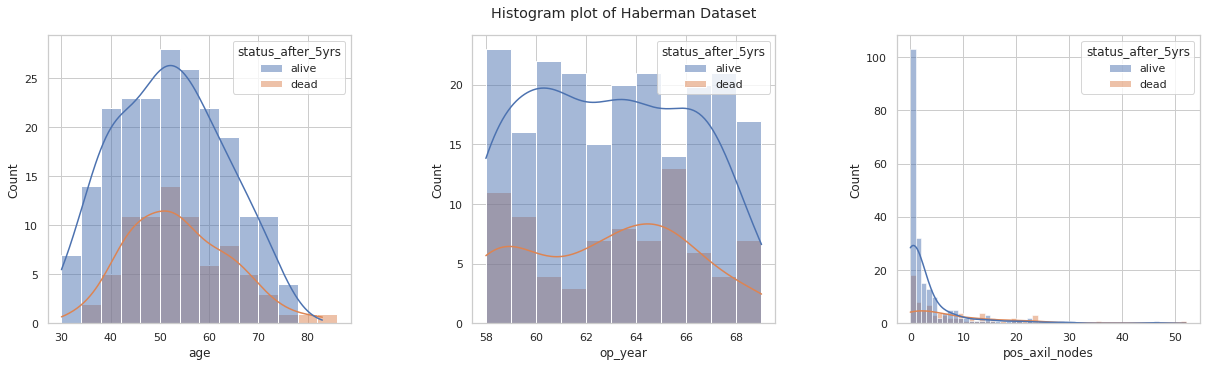

In [21]:

# Distribution plots are used to visually assess how the data points are distributed with respect to its frequency.
# -> Most simple distribution plot is histogram. 
#   The data points are grouped into bins and 
#   the height of the bars representing each group increases with increase in the number of data points lie within that group.

# 1. Histogram
fig, axes = plt.subplots(1, 3, figsize=[20,5])
sns.histplot(
    ax = axes[0],
    data = haberman,
    x = 'age',
    hue = 'status_after_5yrs',
    binwidth = 4,
    kde = True
)
sns.histplot(
    ax = axes[1],
    data = haberman,
    x = 'op_year',
    hue = 'status_after_5yrs',
    binwidth = 1,
    kde = True
)
sns.histplot(
    ax = axes[2],
    data = haberman,
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    binwidth = 1,
    kde = True
)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle("Histogram plot of Haberman Dataset")
plt.show()

In [22]:
nodesValues = dict(haberman.iloc[:,0].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num >= 40 and num <= 60 :
    result = result + value
print(result)

0.6228373702422143


In [23]:
nodesValues = dict(haberman_alive.iloc[:,-2].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num < 5:
    result = result + value
print(result)

0.8238095238095238


In [24]:
nodesValues = dict(haberman_alive.iloc[:,-2].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num > 10:
    result = result + value
print(result)

0.08095238095238093


In [25]:
nodesValues = dict(haberman_dead.iloc[:,-2].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num < 5:
    result = result + value
print(result)

0.5189873417721519


In [26]:
nodesValues = dict(haberman_dead.iloc[:,-2].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num > 10:
    result = result + value
print(result)

0.27848101265822794


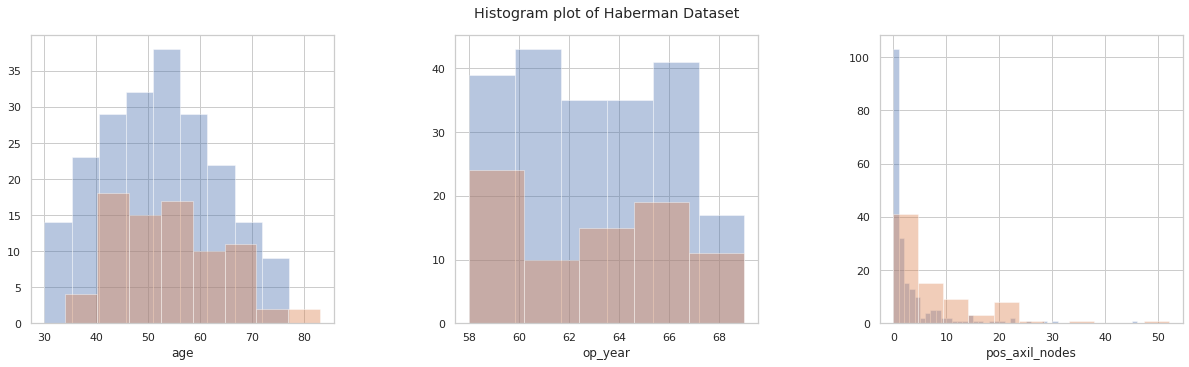

In [27]:
fig, axes = plt.subplots(1, 3, figsize=[20,5])
for idx, feature in enumerate(haberman.columns[:-1]):
  sns.distplot(
      haberman_alive[feature],
      ax = axes[idx],
      kde = False
  )
  sns.distplot(
      haberman_dead[feature],
      ax = axes[idx],
      kde = False
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle("Histogram plot of Haberman Dataset")
plt.show()

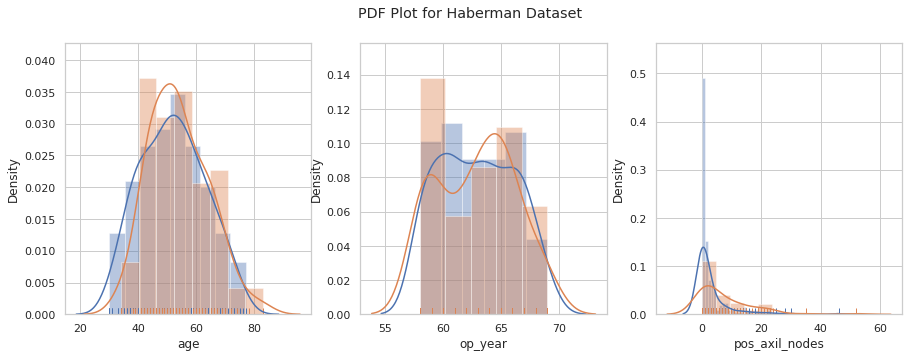

In [28]:
fig, axes = plt.subplots(1, 3, figsize=[15,5])
for idx, feature in enumerate(haberman.columns[:-1]):
  sns.distplot(
      haberman_alive[feature],
      ax = axes[idx],
      rug = True
  )
  sns.distplot(
      haberman_dead[feature],
      ax = axes[idx],
      rug = True
  )
plt.suptitle('PDF Plot for Haberman Dataset')
plt.show()

In [29]:
nodesValues = dict(haberman.iloc[:,-2].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num == 0 :
    result = result + value
    print(num, sum)

0 <built-in function sum>


In [30]:
nodesValues = dict(haberman_alive.iloc[:,-2].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num == 0 :
    result = result + value
    print(num, sum)

0 <built-in function sum>


In [31]:
nodesValues = dict(haberman_dead.iloc[:,-2].value_counts(normalize=True))
result = 0
for num, value in nodesValues.items():
  if num == 0 :
    result = result + value
    print(num, sum)

0 <built-in function sum>


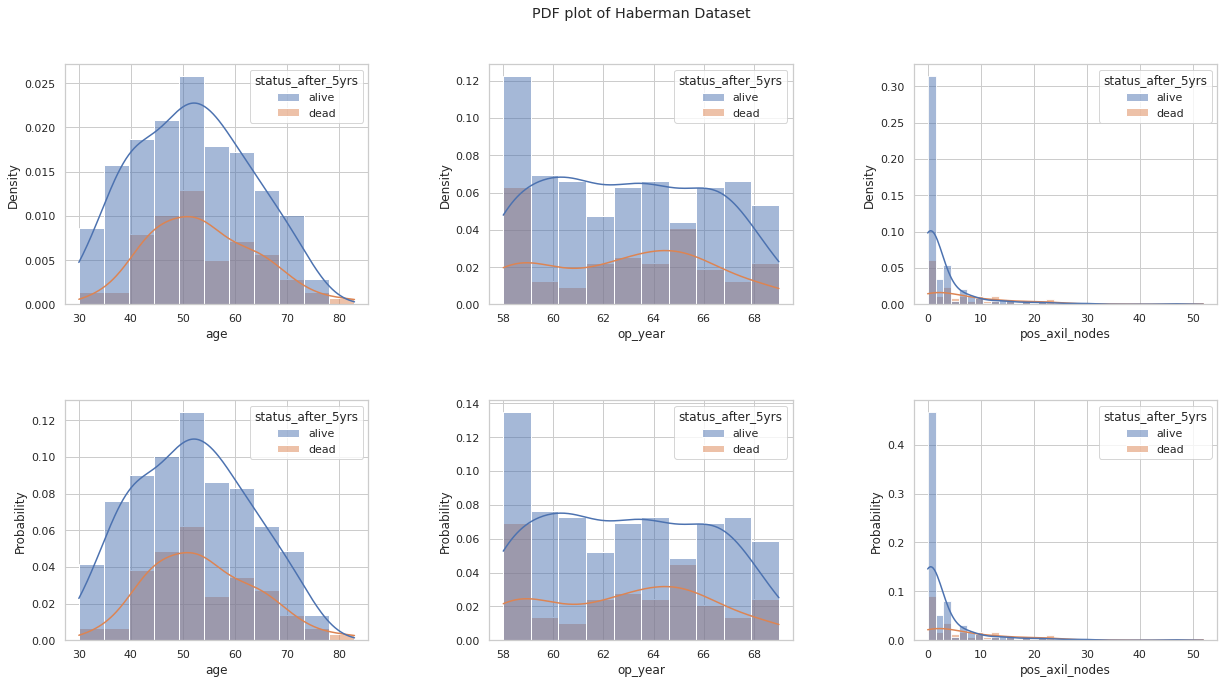

In [32]:
# 2. PDF of the dataset
# -> Probality Density Function (PDF) is the probabilty that the variable takes a value x.
#   This can be said as smoothed version of Histogram.

fig, axes = plt.subplots(2, 3, figsize=[20,10])
for idx, feature in enumerate(haberman.columns[:-1]):
  sns.histplot(
      ax = axes[0][idx],
      data = haberman,
      x = feature,
      hue = 'status_after_5yrs',
      kde = True,
      stat = 'density'
  )
  sns.histplot(
      ax = axes[1][idx],
      data = haberman,
      x = feature,
      hue = 'status_after_5yrs',
      kde = True,
      stat = 'probability'
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle("PDF plot of Haberman Dataset")
plt.show()

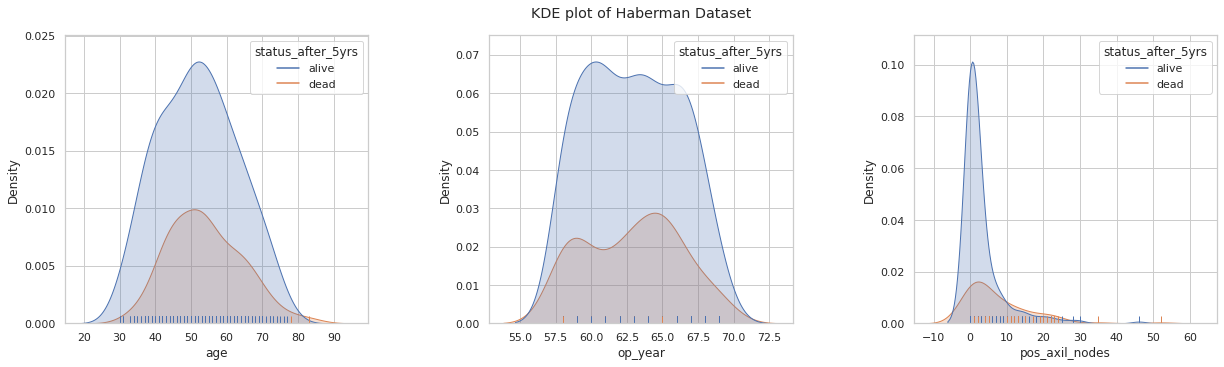

In [33]:
# -> Kernel Density Estimate (KDE) is the way to estimate the PDF. 
fig, axes = plt.subplots(1, 3, figsize=[20,5])
for idx, feature in enumerate(haberman.columns[:-1]):
  sns.kdeplot(
      ax = axes[idx],
      data = haberman,
      x = feature,
      hue = 'status_after_5yrs',
      shade = True
  )
  sns.rugplot(
      ax = axes[idx],
      data = haberman,
      x = feature,
      hue = 'status_after_5yrs'
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle("KDE plot of Haberman Dataset")
plt.show()

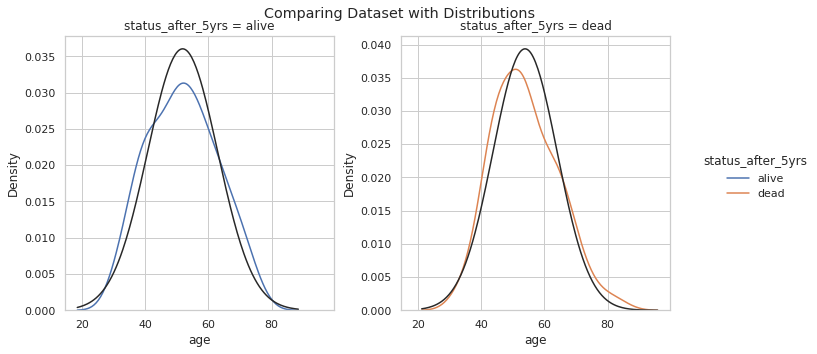

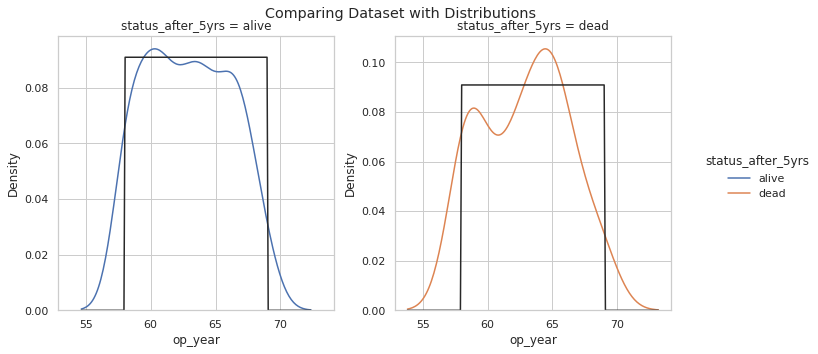

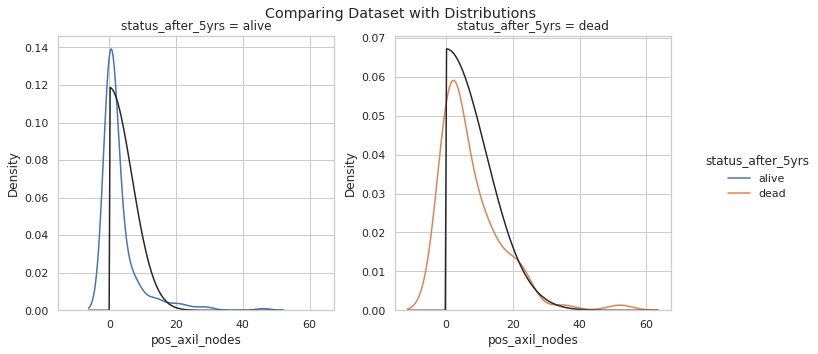

In [34]:
# comparing Haberman PDF with general Distributions

distribution = [stat.norm, stat.uniform, stat.skewnorm]
for idx, feature in enumerate(list(haberman.columns[:-1])):
  fg = sns.FacetGrid(haberman, hue='status_after_5yrs', height=5, col='status_after_5yrs', margin_titles=True, despine=False, sharey=False)
  fg.map(sns.distplot, feature, hist=False, fit=distribution[idx]).add_legend()
  fg.fig.subplots_adjust(top=0.9)
  fg.fig.suptitle('Comparing Dataset with Distributions')
plt.show()

<b><u>Observation:</u></b>
- Dataset 'age' feature shows similarity to normal distribution.
- Dataset 'pos_axil_nodes' feature shows similarity to skew distribution.

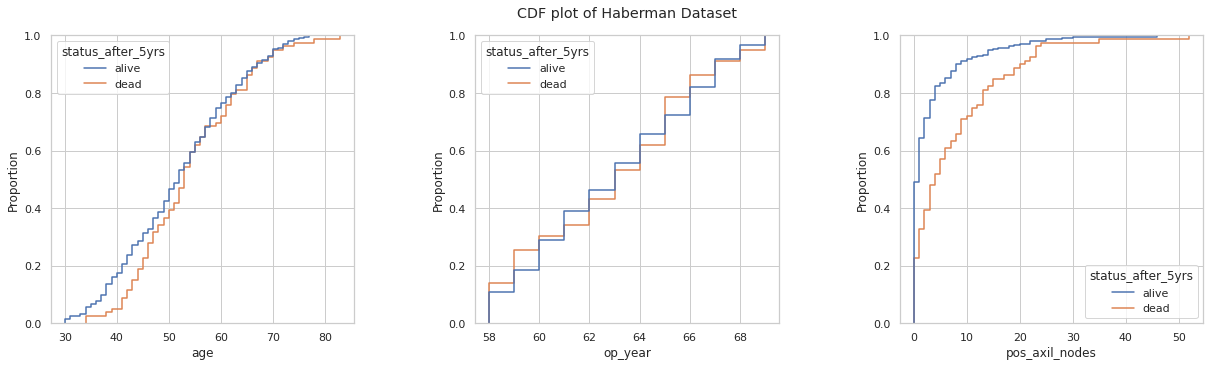

In [35]:
# CDF
# - The cumulative distribution function (cdf) is the probability that the variable takes a value less than or equal to x.


fig, axes = plt.subplots(1, 3, figsize=[20,5])
for idx, feature in enumerate(haberman.columns[:-1]):
  sns.ecdfplot(
      ax = axes[idx],
      data = haberman,
      x = feature,
      hue = 'status_after_5yrs',
      stat = 'proportion'
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.suptitle("CDF plot of Haberman Dataset")
plt.show()

CDF of feature - age 

Bin-Edge : 30.0, PDF : 0.03333333333333335, CDF : 0.03333333333333335
Bin-Edge : 33.61538461538461, PDF : 0.06666666666666657, CDF : 0.09999999999999992
Bin-Edge : 37.23076923076923, PDF : 0.07619047619047624, CDF : 0.17619047619047618
Bin-Edge : 40.84615384615385, PDF : 0.10952380952380958, CDF : 0.28571428571428575
Bin-Edge : 44.46153846153846, PDF : 0.09999999999999987, CDF : 0.3857142857142856
Bin-Edge : 48.07692307692308, PDF : 0.10000000000000005, CDF : 0.48571428571428565
Bin-Edge : 51.69230769230769, PDF : 0.14285714285714293, CDF : 0.6285714285714286
Bin-Edge : 55.30769230769231, PDF : 0.08571428571428576, CDF : 0.7142857142857143
Bin-Edge : 58.92307692307692, PDF : 0.0857142857142856, CDF : 0.7999999999999999
Bin-Edge : 62.53846153846154, PDF : 0.09047619047619035, CDF : 0.8904761904761903
Bin-Edge : 66.15384615384616, PDF : 0.03809523809523812, CDF : 0.9285714285714284
Bin-Edge : 69.76923076923077, PDF : 0.05238095238095242, CDF : 0.9809523809523808
Bi

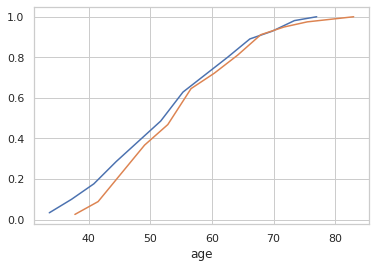

In [36]:
# plt.figure(figsize=(10,5))
print(f'CDF of feature - age \n')
counts, bin_edges = np.histogram(haberman_alive.age, bins=13, density = True)
counts2, bin_edges2 = np.histogram(haberman_dead.age, bins=13, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)

for i in range(len(bin_edges)-1):
  print(f'Bin-Edge : {bin_edges[i]}, PDF : {pdf[i]}, CDF : {cdf[i]}')
print('-'*100)
for i in range(len(bin_edges2)-1):
  print(f'Bin-Edge : {bin_edges2[i]}, PDF : {pdf2[i]}, CDF : {cdf2[i]}')


# plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.xlabel('age')
plt.show()

CDF of feature - op_year 

Bin-Edge : 58.0, PDF : 0.10952380952380952, CDF : 0.10952380952380952
Bin-Edge : 59.0, PDF : 0.0761904761904762, CDF : 0.18571428571428572
Bin-Edge : 60.0, PDF : 0.10476190476190476, CDF : 0.2904761904761905
Bin-Edge : 61.0, PDF : 0.1, CDF : 0.39047619047619053
Bin-Edge : 62.0, PDF : 0.07142857142857142, CDF : 0.46190476190476193
Bin-Edge : 63.0, PDF : 0.09523809523809523, CDF : 0.5571428571428572
Bin-Edge : 64.0, PDF : 0.1, CDF : 0.6571428571428571
Bin-Edge : 65.0, PDF : 0.06666666666666667, CDF : 0.7238095238095238
Bin-Edge : 66.0, PDF : 0.09523809523809523, CDF : 0.819047619047619
Bin-Edge : 67.0, PDF : 0.1, CDF : 0.919047619047619
Bin-Edge : 68.0, PDF : 0.08095238095238096, CDF : 1.0
----------------------------------------------------------------------------------------------------
Bin-Edge : 58.0, PDF : 0.13924050632911392, CDF : 0.13924050632911392
Bin-Edge : 59.0, PDF : 0.11392405063291139, CDF : 0.25316455696202533
Bin-Edge : 60.0, PDF : 0.0506329113

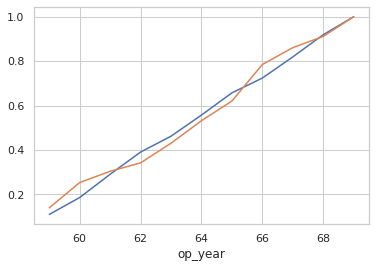

In [37]:
# plt.figure(figsize=(10,5))
print(f'CDF of feature - op_year \n')
counts, bin_edges = np.histogram(haberman_alive.op_year, bins=11, density = True)
counts2, bin_edges2 = np.histogram(haberman_dead.op_year, bins=11, density = True)
pdf = counts/(np.sum(counts))
cdf = np.cumsum(pdf)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)

for i in range(len(bin_edges)-1):
  print(f'Bin-Edge : {bin_edges[i]}, PDF : {pdf[i]}, CDF : {cdf[i]}')
print('-'*100)
for i in range(len(bin_edges2)-1):
  print(f'Bin-Edge : {bin_edges2[i]}, PDF : {pdf2[i]}, CDF : {cdf2[i]}')


# plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.xlabel('op_year')
plt.show()

CDF of feature - pos_axil_nodes 

Bin-Edge : 0.0, PDF : 0.8238095238095238, CDF : 0.8238095238095238
Bin-Edge : 4.181818181818182, PDF : 0.07619047619047618, CDF : 0.8999999999999999
Bin-Edge : 8.363636363636363, PDF : 0.028571428571428574, CDF : 0.9285714285714285
Bin-Edge : 12.545454545454545, PDF : 0.028571428571428574, CDF : 0.9571428571428571
Bin-Edge : 16.727272727272727, PDF : 0.014285714285714292, CDF : 0.9714285714285714
Bin-Edge : 20.909090909090907, PDF : 0.014285714285714282, CDF : 0.9857142857142857
Bin-Edge : 25.09090909090909, PDF : 0.00476190476190476, CDF : 0.9904761904761904
Bin-Edge : 29.272727272727273, PDF : 0.004761904761904764, CDF : 0.9952380952380951
Bin-Edge : 33.45454545454545, PDF : 0.0, CDF : 0.9952380952380951
Bin-Edge : 37.63636363636363, PDF : 0.0, CDF : 0.9952380952380951
Bin-Edge : 41.81818181818181, PDF : 0.004761904761904756, CDF : 0.9999999999999999
----------------------------------------------------------------------------------------------------


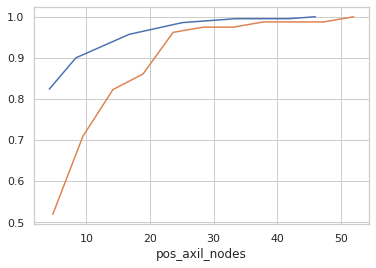

In [38]:
# plt.figure(figsize=(10,5))
print(f'CDF of feature - pos_axil_nodes \n')
counts, bin_edges = np.histogram(haberman_alive.pos_axil_nodes, bins=11, density = True)
counts2, bin_edges2 = np.histogram(haberman_dead.pos_axil_nodes, bins=11, density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
pdf2 = counts2/(sum(counts2))
cdf2 = np.cumsum(pdf2)

for i in range(len(bin_edges)-1):
  print(f'Bin-Edge : {bin_edges[i]}, PDF : {pdf[i]}, CDF : {cdf[i]}')
print('-'*100)
for i in range(len(bin_edges2)-1):
  print(f'Bin-Edge : {bin_edges2[i]}, PDF : {pdf2[i]}, CDF : {cdf2[i]}')


# plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
# plt.plot(bin_edges2[1:], pdf2)
plt.plot(bin_edges2[1:], cdf2)
plt.xlabel('pos_axil_nodes')
plt.show()

<b><u>BOX PLOTS:</u></b>
<p>
Box plot takes a less space and visually represents the five number summary of the data points in a box. 
<p>The outliers are displayed as points outside the box.


1.   Q1 - 1.5*IQR
2.   Q1 (25th percentile)
3.   Q2 (50th percentile or median)
4.   Q3 (75th percentile)
5.   Q3 + 1.5*IQR </p>

Inter Quartile Range(IQR) = Q3 -Q1

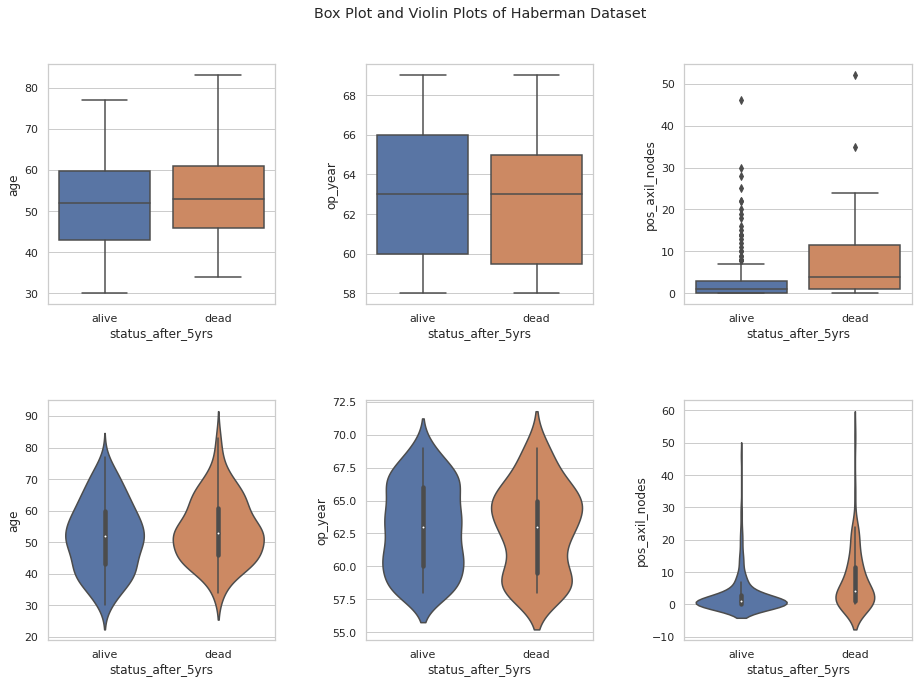

In [39]:
# BOX PLOTS AND VIOLIN PLOTS

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, feature in enumerate(list(haberman.columns)[:-1]):
  sns.boxplot(
      ax = axes[0][idx],
      x = 'status_after_5yrs',
      y = feature,
      data = haberman
  )
  sns.violinplot(
      ax = axes[1][idx],
      x = 'status_after_5yrs',
      y = feature,
      data = haberman
  )
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)  
plt.suptitle('Box Plot and Violin Plots of Haberman Dataset')
plt.show()


In [40]:
count = 0
for axils in haberman_alive.pos_axil_nodes:
  if axils < 5:
    count += 1
print('Percentage of alive patients less than 5 nodes :',round(count/len(haberman_alive)*100, 2), '%')

Percentage of alive patients less than 5 nodes : 82.38 %


<b><u>Observations : </u></b>
<p><i> From Box-Plot we can observe presence of outliers in 'pos_axil_nodes'.
<p><i> Most of the patients(around 82 %) have very low(less than 5) 'pos_axil_nodes'.
<p><i> Most of the patients survived are in age of 40 years - 60 years.
<p><i> Patient's operated after 1959 till 1966 have slightly higher chances of survival

## Multivariate Analysis 

<p><i>Multivariate analysis is a Statistical procedure for analysis of data involving more than one type of measurement or observation. It may also mean solving problems where more than one feature variable is analyzed simultaneously with other variables.</i>

<b><u>PAIR PLOTS:</u></b>

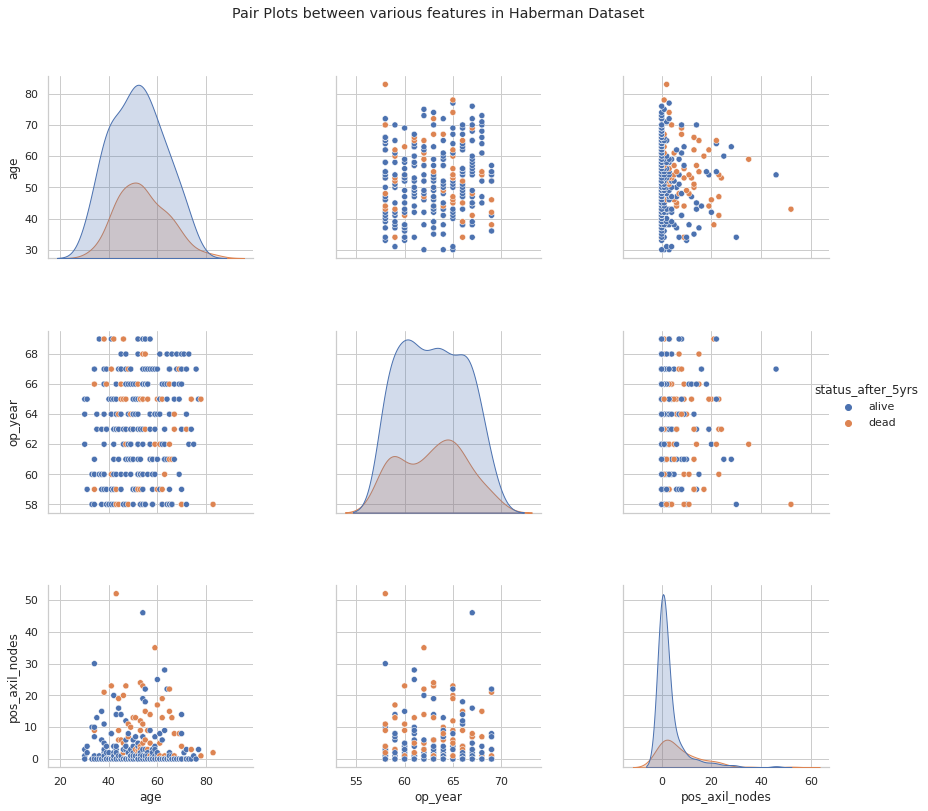

In [41]:
# PAIR PLOT

sns.pairplot(
    data = haberman,
    hue = 'status_after_5yrs',
    size = 4
)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle('Pair Plots between various features in Haberman Dataset')
plt.show()

<b><u>Observation:</u></b>
<p> Its difficult to predict anything from two feature variable plots.

<b><u>SCATTER PLOTS:</u></b>

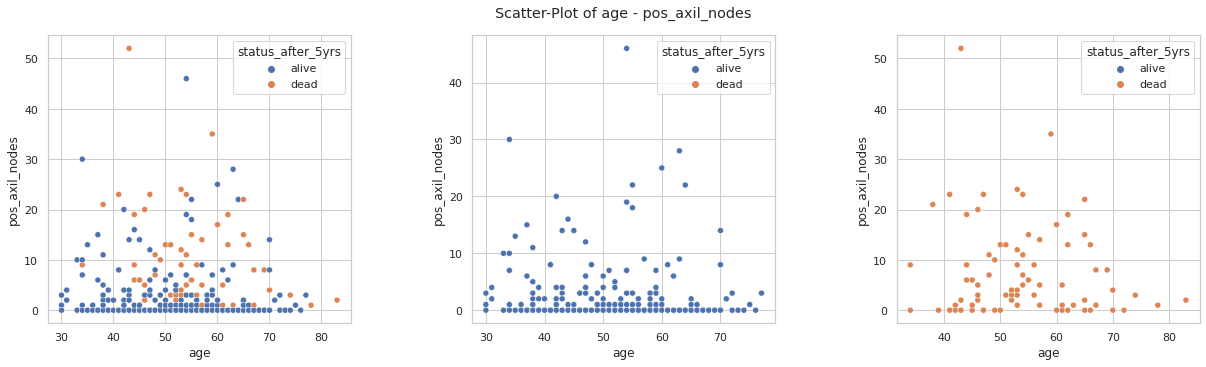

In [42]:
fig, axes = plt.subplots(1, 3, figsize=[20,5])
sns.scatterplot(
    data = haberman,
    x = 'age',
    y = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    ax = axes[0]
)
sns.scatterplot(
    data = haberman_alive,
    x = 'age',
    y = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    ax = axes[1]
)
sns.scatterplot(
    data = haberman_dead,
    x = 'age',
    y = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    ax = axes[2]
)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle('Scatter-Plot of age - pos_axil_nodes')
plt.show()

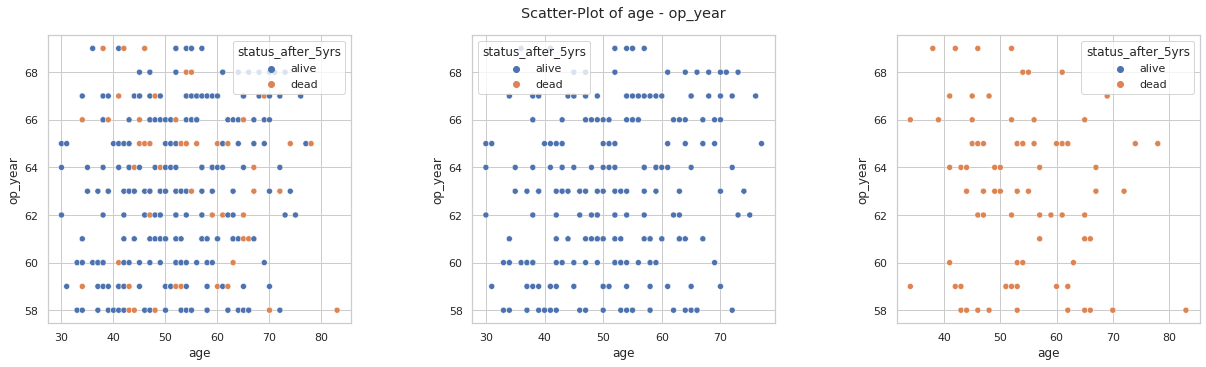

In [43]:
fig, axes = plt.subplots(1, 3, figsize=[20,5])
sns.scatterplot(
    data = haberman,
    x = 'age',
    y = 'op_year',
    hue = 'status_after_5yrs',
    ax = axes[0]
)
sns.scatterplot(
    data = haberman_alive,
    x = 'age',
    y = 'op_year',
    hue = 'status_after_5yrs',
    ax = axes[1]
)
sns.scatterplot(
    data = haberman_dead,
    x = 'age',
    y = 'op_year',
    hue = 'status_after_5yrs',
    ax = axes[2]
)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle('Scatter-Plot of age - op_year')
plt.show()

<b><u>Observation : </u></b>
<p> age vs op_year pair is not suitable for prediction.

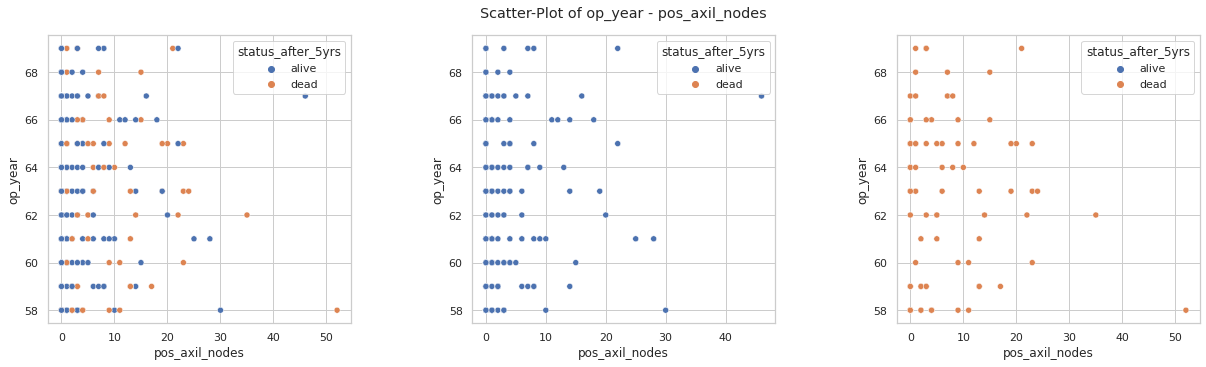

In [44]:
fig, axes = plt.subplots(1, 3, figsize=[20,5])
sns.scatterplot(
    data = haberman,
    y = 'op_year',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    ax = axes[0]
)
sns.scatterplot(
    data = haberman_alive,
    y = 'op_year',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    ax = axes[1]
)
sns.scatterplot(
    data = haberman_dead,
    y = 'op_year',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    ax = axes[2]
)
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4) 
plt.suptitle('Scatter-Plot of op_year - pos_axil_nodes')
plt.show()

<b><u>JOINT PLOTS:

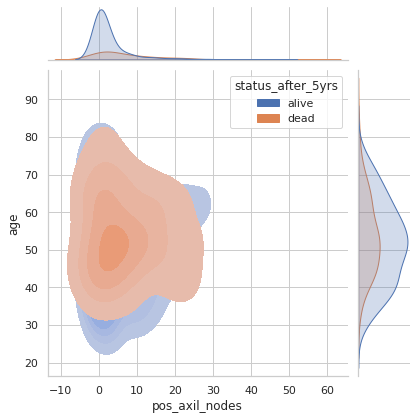

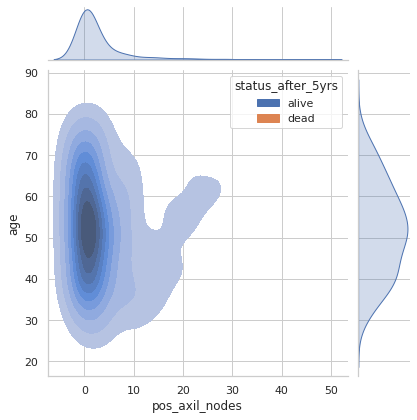

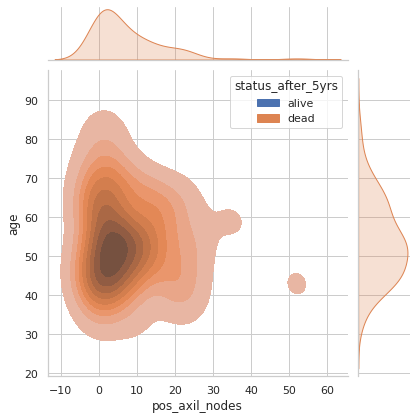

In [67]:
# Joint plots

sns.jointplot(
    data = haberman,
    y = 'age',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
sns.jointplot(
    data = haberman_alive,
    y = 'age',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
sns.jointplot(
    data = haberman_dead,
    y = 'age',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
plt.show()

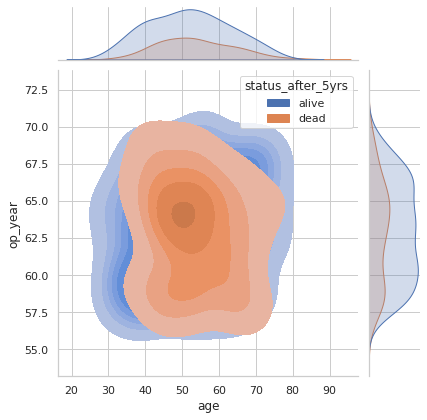

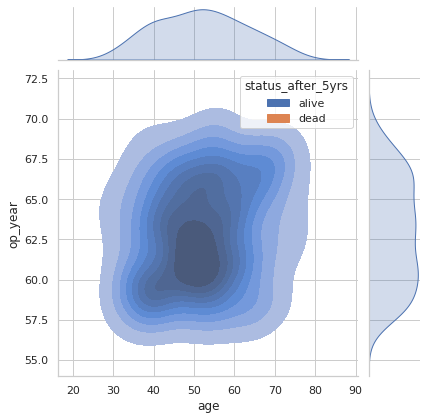

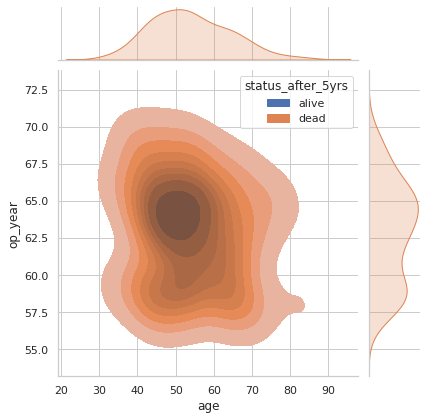

In [66]:
# Joint plots

sns.jointplot(
    data = haberman,
    y = 'op_year',
    x = 'age',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
sns.jointplot(
    data = haberman_alive,
    y = 'op_year',
    x = 'age',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
sns.jointplot(
    data = haberman_dead,
    y = 'op_year',
    x = 'age',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
plt.show()

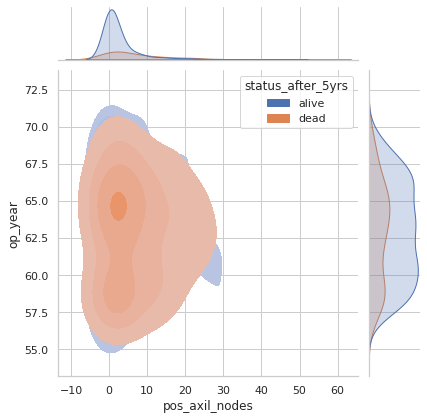

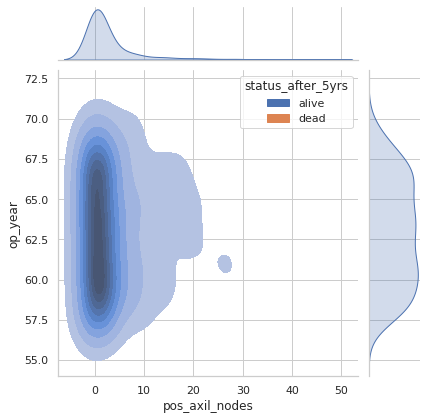

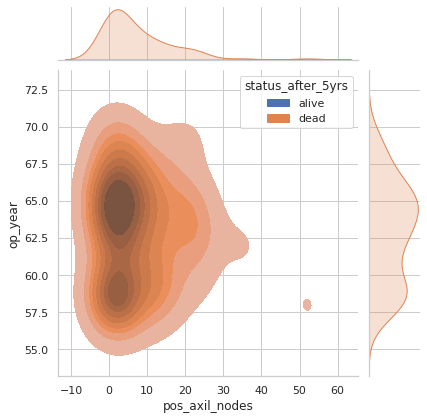

In [65]:
# Joint plots

sns.jointplot(
    data = haberman,
    y = 'op_year',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
sns.jointplot(
    data = haberman_alive,
    y = 'op_year',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
sns.jointplot(
    data = haberman_dead,
    y = 'op_year',
    x = 'pos_axil_nodes',
    hue = 'status_after_5yrs',
    kind = 'kde',
    fill = True
)
plt.show()

<b><u>3D PLOTS

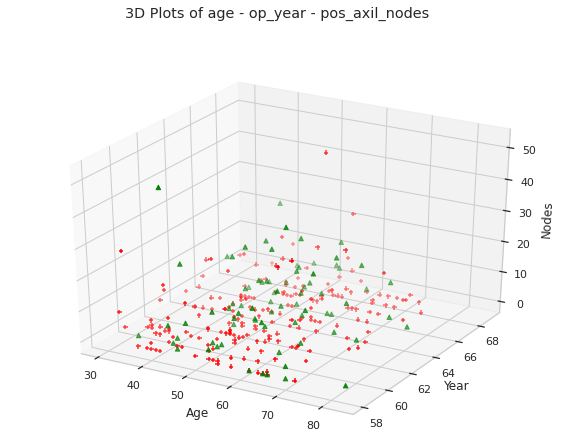

In [45]:
# 3D plots

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

xa = haberman_alive['age']
ya = haberman_alive['op_year']
za = haberman_alive['pos_axil_nodes']

xb = haberman_dead['age']
yb = haberman_dead['op_year']
zb = haberman_dead['pos_axil_nodes']

ax.set_xlabel('Age')
ax.set_ylabel('Year')
ax.set_zlabel('Nodes')

ax.scatter3D(xa, ya, za, color = 'red', marker = '+')
ax.scatter3D(xb, yb, zb, color = 'green', marker = '^')

plt.suptitle('3D Plots of age - op_year - pos_axil_nodes')
plt.show()

# Summary of EDA Performed :

<i> <b>Haberman Dataset</b> contains case study that was conducted in the period of 1958 - 1970 at the University of Chicago's Bilings Hospital on the survival of patients who had undergone surgery for Breast Cancer. Haberman Dataset contains four columns namely - **age, year, nodes, status** with status being class attribute.

<p>
Number of Instances: 306 <br>
Number of Attributes: 4 (including the class attribute) <br>

  **Attribute Description :**
- [**age**] Age of patient at time of operation (numerical)
- [**year**] Patient's year of operation (year - 1900, numerical)
- [**nodes**] Number of positive axillary nodes detected (numerical)
- [**status**] Survival status (class attribute) : <br>
 - 1 = the patient survived 5 years or longer
 - 2 = the patient died within 5 year

<p> We are performing EDA on Haberman Dataset. First, we do some preprocessing steps to check whether dataset contains any duplicate records, any missing values, any undefined(NaN) values and correcting these problems if found. Then, adjust the names, parameters according to our requirements like changing columns names for better understanding, class attribute to categorical-type.<br>
We checked, observed and corrected the following :
<ul> 
<li> Checked For Duplicates <br>
<b>Found 17 duplicate records and removed them. </b>
<li> Checked for any Missing values<br>
<b>No Missing Values Found.</b>
<li> Checked for Any Undefined(NaN) Values<br>
<b>No NaN or undefined values Found.</b>
</ul>
Following changes are made to the dataset :
<ul>
<li> Changed 'year' to 'op_year'
<li> Changed 'nodes' to 'pos_axil_nodes'
<li> Changed 'status' to 'status_after_5yrs'
  <ul>
  For better understanding of status classes
  <li> Changed status value 1 to 'alive'
  <li> Changed status value 2 to 'dead'
  </ul>
<li> Changed 'status' column to categorical type
</ul>

<p> We performed various Statistical Analysis to find various statistics about Haberman Dataset and its Data. We observed and concluded the following -
<ul>
<li> Shape of the dataset is (289, 4).<br>
<b> Dataset contains 289 records and 4 attributes.</b>
<li> Feature Attributes : age, op_year, pos_axil_nodes.<br>
 Class attrinbute : status_after_5yrs
<li> Age of patients from 30 to 83 years with median of 52 years.
<li> Number of Positive Axilary Nodes of patients ranges from 0 to 52.
<li> Maximum number of positive axillary nodes observed is 52 but 75% of the patients have less than 6 positive axillary nodes.<br>
<b> Due to such large differences in 75th percentile and Maximum Value of Number of Positive Axillary Nodes, presence of outliers is concluded.</b>
<li> With Nearly 73% of values is in 'alive' category of the class attribute 'status_after_5yrs'.<br>
<b> Haberman Dataset is Imbalanced Dataset.</b>


<i> Our Objective is to predict whether the patient will survive for 5yrs or more after the operation is performed using features like age of patients, year of operation, number of positive axillary nodes.
<p> This is a two-class classifiction problem with three features, and class values being 'alive' and 'dead'.
<p> 73% of the patients in dataset belongs 'alive' category and 27% belongs to 'dead' category creting a imbalanced dataset. 

Next, We performed various visualizations using graphs and plots to further explore the data. We observed following - 
<ul>
<b>Histogram Analysis : </b>
<li>We observed overlapping between 'alive' and 'dead' patients. But below the age of 34 years patients have very high chances of survival and above the age of 78 years have very low chances of survival.
<li> In the alive category, 8% of patient's with number of axillary nodes greater than 10 whereas 82% of patient's with number of nodes less than 5 nodes.
<li> In the dead category, 27% of patient's with number of axillary nodes greater than 10 whereas 51% of patient's with number of nodes less than 5 nodes.
<br>
</ul>
<ul>
<b>PDF Analysis</b>
<li> PDF also shows overlapping. Also PDF graph of age-feature is similar to Gaussian Distribution. This shows age of the patient is Normally Distributed.
<li> Most(62%) of the patients are in age group of 40-60 years. 
<li> PDF plot of number of positive axillary nodes shows skew-normal distribution.
<li> 49% of the alive category patients have zero axillary node compared to 22% of patients in dead category.
<br>
</ul>
<ul>
<b>CDF Analysis</b>
<li> Nothing helpful can be observed from the CDF plot of age of the patients and their year of operation.
<li> CDF plot of number of axillary nodes shows that lower the number of axillary nodes lower the probability of being dead after 5 years of operation or higher the probability of being alive for 5 years or more.
</ul> 
<ul>
<b>BOX Plot Analysis</b>
<li> BOX plots shows the quantiles, median, maximum value, minimum values of the dataset.
<li> From the BOX plot of number of axillary nodes it can be observed that there are outliers present in it. 
</ul> 
<ul>
<b>VIOLIN Plot Analysis</b>
<li> From VIOLIN plot, it can be observed that most of the age of patients is concentrated in the region of 40-60 years.
<li> Most patients operation was performed durning the period of 1960-1967.
<li> Most patients are having very low number of positive axillary nodes. 
</ul> 
<ul>
<b>SCATTER Plot Analysis</b>
<li> Combination of 'op_year' vs 'pos_axil_nodes' have better plot compared to other features combination. But still nothing conclusive can be found for our objective. 
</ul> 

<i>From the EDA we can estimate priority of feature as <b> NUMBER OF POSITIVE AXILLARY NODES > AGE OF THE PATIENTS > YEAR OF OPERATION.
<p> Less the number of positive axillary nodes and less the age of the patients better for our classification. Many features are not included in the dataset such as their habits, diet, environment after the operation which affects the lifespan of the patients.

# END

<i> 